In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [3]:
data= pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
data["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
data["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
data.drop(columns=["RowNumber","Surname","CustomerId"], inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data = pd.get_dummies(data, columns= ["Geography", "Gender"], drop_first=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
x = data.drop(columns="Exited")
y = data["Exited"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [14]:
sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [15]:
smote = SMOTE(sampling_strategy="minority")
x_train_sm, y_train_sm = smote.fit_resample(x_train_scaled,y_train)


In [16]:
model = Sequential()
model.add(Dense(11, activation="relu", input_dim=11))
model.add(Dense(11, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

2022-04-15 14:26:20.679541: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [19]:
history = model.fit(x_train_sm,y_train_sm,epochs=100, validation_split=0.2)

2022-04-15 14:26:21.034707: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
318/318 [==============================] - 2s 3ms/step - loss: 0.6451 - accuracy: 0.6350 - val_loss: 0.8290 - val_accuracy: 0.4541
Epoch 2/100
318/318 [==============================] - 1s 2ms/step - loss: 0.5522 - accuracy: 0.7222 - val_loss: 0.7718 - val_accuracy: 0.5337
Epoch 3/100
318/318 [==============================] - 1s 2ms/step - loss: 0.5090 - accuracy: 0.7549 - val_loss: 0.6830 - val_accuracy: 0.6341
Epoch 4/100
318/318 [==============================] - 1s 2ms/step - loss: 0.4712 - accuracy: 0.7785 - val_loss: 0.6201 - val_accuracy: 0.6766
Epoch 5/100
318/318 [==============================] - 1s 2ms/step - loss: 0.4512 - accuracy: 0.7861 - val_loss: 0.6221 - val_accuracy: 0.6751
Epoch 6/100
318/318 [==============================] - 1s 2ms/step - loss: 0.4418 - accuracy: 0.7890 - val_loss: 0.5889 - val_accuracy: 0.6885
Epoch 7/100
318/318 [==============================] - 1s 2ms/step - loss: 0.4364 - accuracy: 0.7917 - val_loss: 0.5930 - val_accuracy: 0.6861

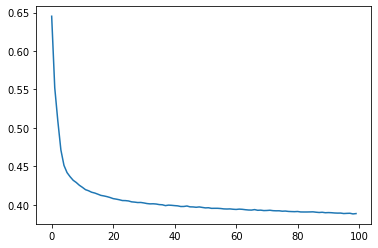

In [20]:
plt.plot(history.history["loss"])

In [21]:
# 11x3 values of weights and 3 bias values of 1st layer
model.layers[0].get_weights()

[array([[ 9.1812417e-02,  4.0559046e-02,  3.1821182e-01, -2.2705300e-01,
         -7.0514077e-01, -3.0785082e-02,  7.9871230e-02,  1.0481077e-01,
         -5.6385715e-02, -1.7217077e-01,  8.4745236e-02],
        [ 9.9483609e-01, -8.4665149e-02, -2.2389510e-01,  4.4645491e-01,
         -4.4931898e-01, -5.5990916e-01, -1.4013512e-01,  4.8276308e-01,
          2.4701428e-01,  1.0959352e+00, -8.8866967e-01],
        [ 5.4824084e-01,  2.3637341e-01, -1.8361323e-02, -1.6590002e-01,
          4.9671003e-01, -3.9662290e-01,  8.6151078e-02,  3.3821592e-01,
          6.9100104e-02,  5.4869596e-02,  4.5412153e-01],
        [-8.7758131e-02,  1.4678115e-01, -2.9696423e-01, -5.9415311e-01,
         -4.0611941e-01,  1.0189478e-01, -3.3434570e-01, -8.2351220e-01,
          1.4851712e-01,  1.1170666e-01,  1.1728704e+00],
        [ 2.8171076e-02, -2.6069671e-01, -2.1329881e-01, -4.9005434e-01,
         -5.5108380e-01,  2.4300949e-01,  2.2091808e+00, -1.5495034e-01,
          5.8087015e-01,  8.1888521e-0

In [22]:
# 3x1 values of weights and 1 bias values of 2st layer
model.layers[1].get_weights()

[array([[ 2.4378331e-01,  2.9564509e-01, -5.8136380e-01, -4.0071240e-01,
         -3.6393404e-01,  4.0559042e-02, -5.8776116e-01,  1.2904482e-01,
         -4.6519840e-01,  6.6814667e-01,  5.6496525e-01],
        [-9.5080487e-02, -2.4856129e-01,  9.4631277e-03, -4.0229559e-01,
          1.2635354e-02,  1.5932196e-01,  5.9378314e-01, -3.5720003e-01,
          7.8653477e-02, -4.3781906e-01, -2.3581970e-01],
        [ 2.8390095e-01,  2.2402591e-01,  5.9017897e-01, -1.7069599e-01,
         -4.5029974e-01, -2.6918381e-01,  2.8880423e-02, -2.0973483e-01,
          5.6339800e-01,  1.3902119e-01,  1.2156995e-01],
        [ 2.6086614e-01,  5.1766610e-01, -1.3874610e-01, -8.8405865e-01,
          3.4091666e-01,  6.8033069e-01,  2.2178236e-01, -6.0988700e-01,
         -2.4317059e-01,  2.1359836e-01, -4.8215082e-01],
        [ 1.8650966e-02, -2.7682689e-01,  3.2916483e-01,  5.3085899e-01,
         -4.5623586e-01,  3.4432986e-01,  4.7732091e-01, -5.1561054e-02,
          3.6757484e-01,  5.7865888e-0

In [23]:
predicted = model.predict(x_test_scaled)

In [24]:
# As the output should be 0 or 1 depending upon Dataset, so considering the threeshold value of 0.5 for this case

pred = np.where(predicted >0.5,1,0)

In [25]:
accuracy_score(y_test,pred)*100

82.85